<a href="https://colab.research.google.com/github/tkrsh/Project-TrashIt/blob/master/TrashIt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [7]:

from google.colab import files
uploaded = files.upload()

Saving dataset-resized.zip to dataset-resized.zip


In [0]:
classes=['cardboard','glass','metal','paper','plastic']

In [14]:
!ls

dataset-resized  dataset-resized.zip  __MACOSX	sample_data


In [0]:
path='dataset-resized'

In [0]:

tfms=get_transforms(do_flip=True)

In [0]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [18]:
data.classes

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

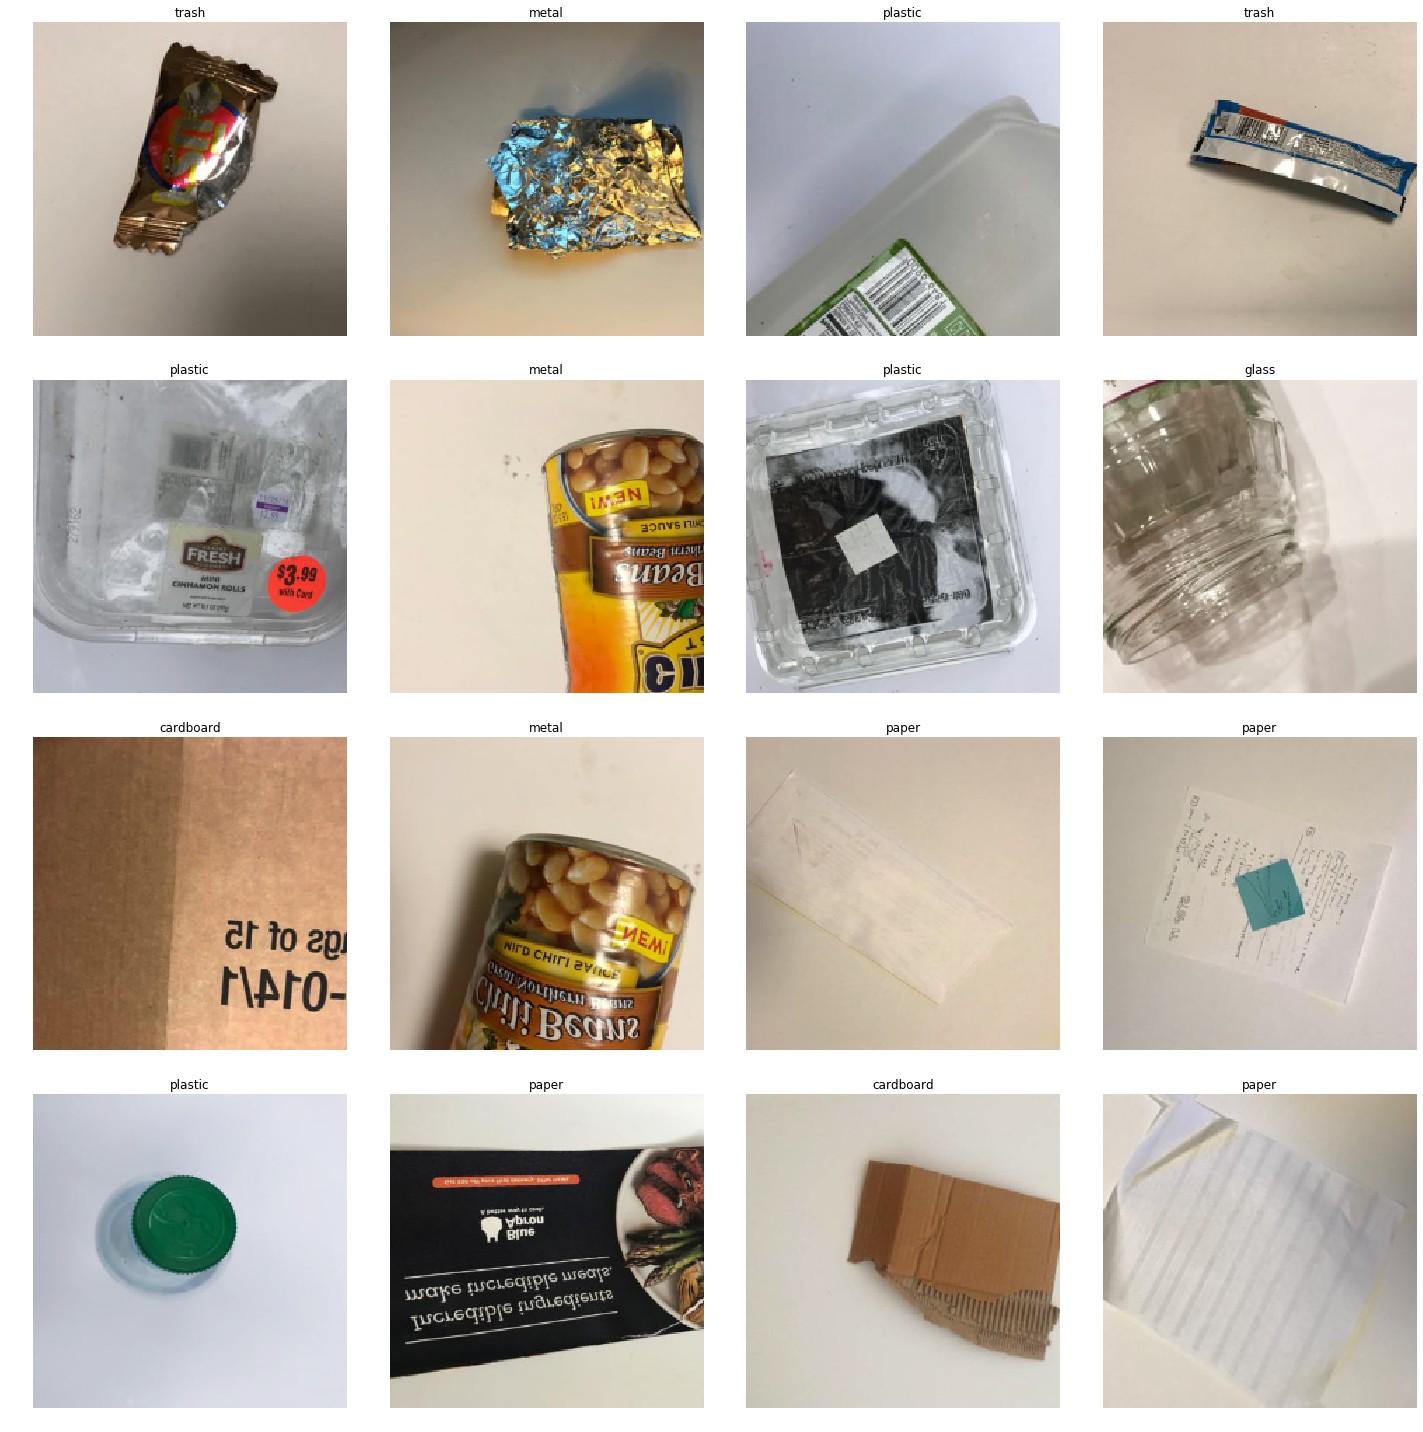

In [42]:
data.show_batch(rows=4,figsize=(20,20))

In [21]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:03<00:00, 28133662.69it/s]


In [22]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,0.981295,0.517586,0.148515,00:29
1,0.635227,0.434533,0.140594,00:28
2,0.454329,0.402476,0.130693,00:28
3,0.343092,0.396680,0.120792,00:28


In [28]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

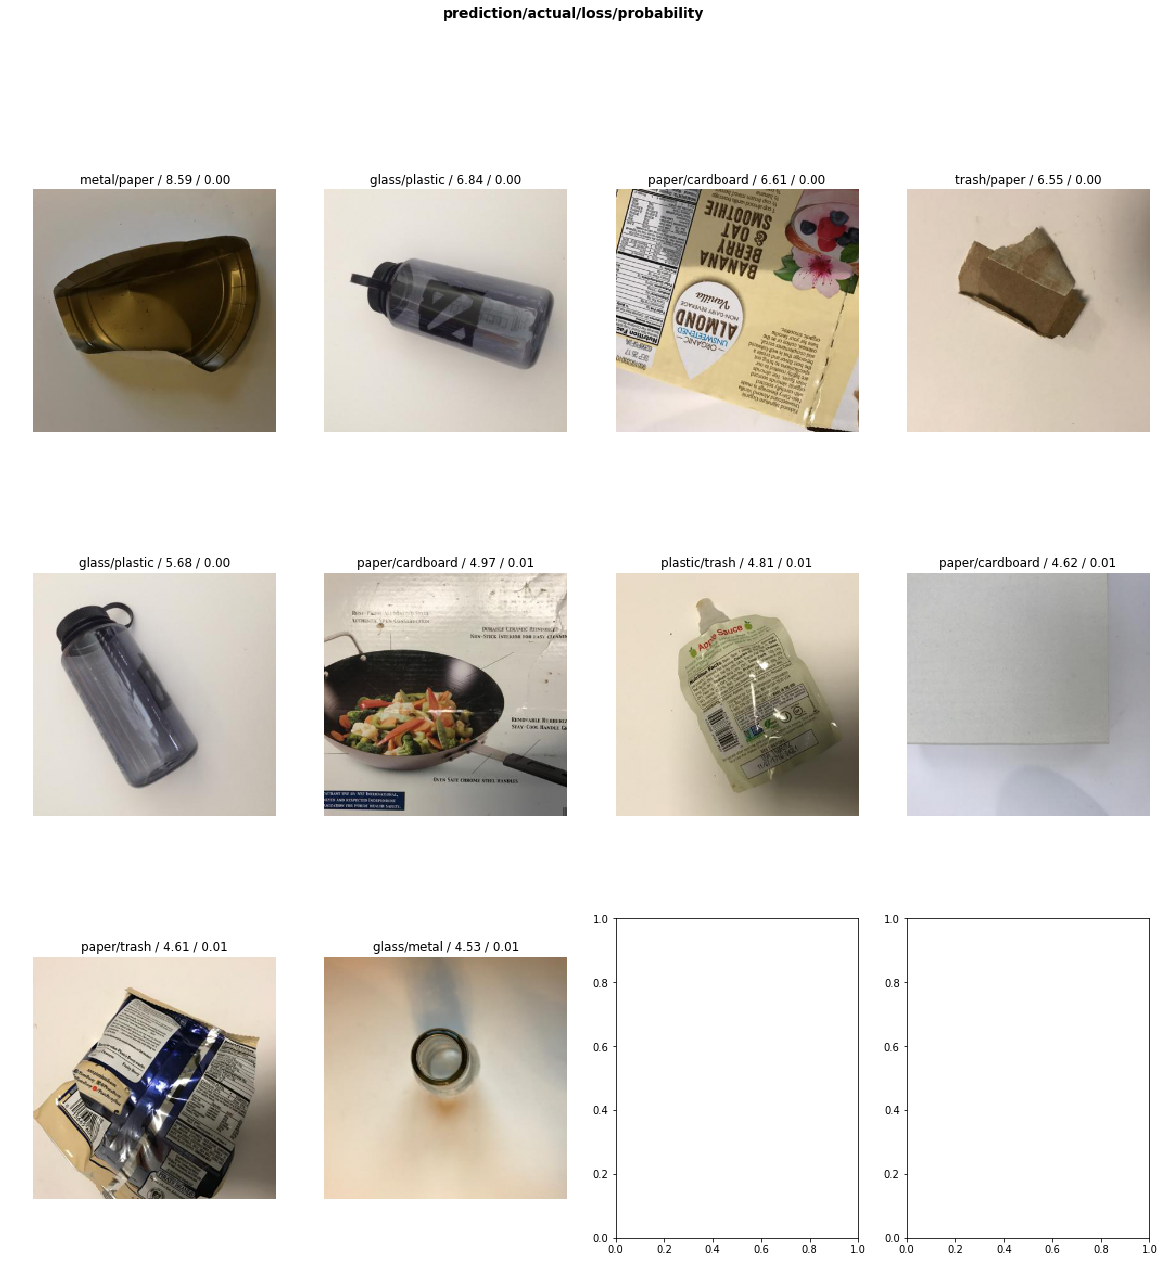

In [41]:
interp.plot_top_losses(10, figsize=(20,20))


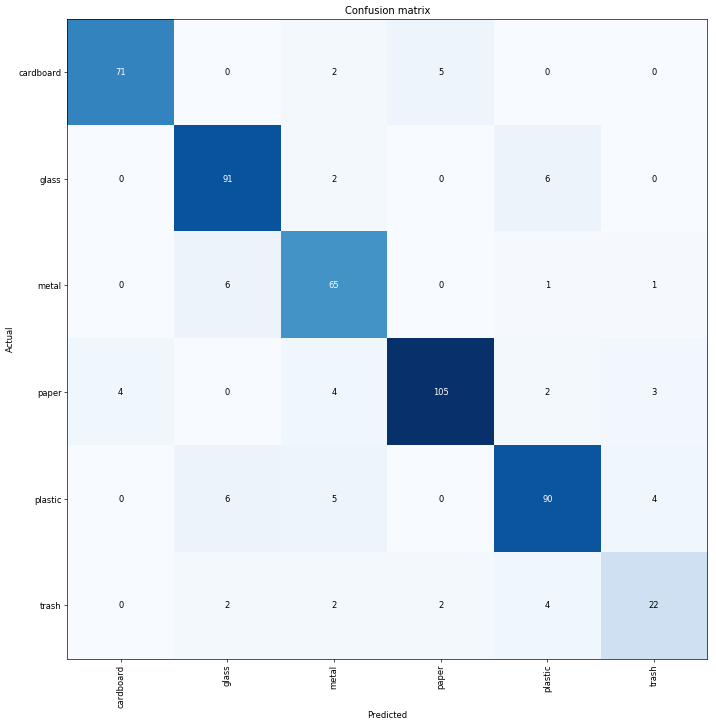

In [32]:
|interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
